<a href="https://colab.research.google.com/github/frank-morales2020/Cloud_curious/blob/master/C5_PAPERBANANA_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dwzhu-pku.github.io/PaperBanana/

In [ ]:
!pip install -q google-generativeai
!pip install -U google-genai

## CASE5

🍌 [Planner Agent]: Extracting Sequential Logic...
🍌 [Critic Agent]: Compressing for Vertical Column Layout...
✅ Vertical Workflow: ['Local TEE', 'Differential Privacy', 'Federated Fine-Tuning', 'Guardrail Validation', 'Air-Gapped Deployment']


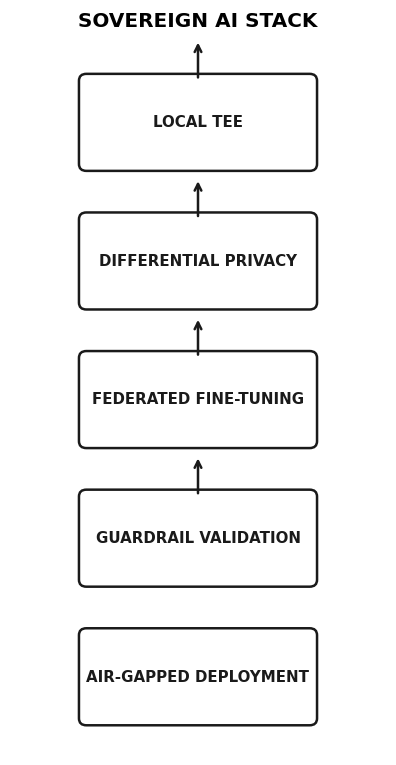

In [ ]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- SETUP ---
client = genai.Client(api_key=userdata.get('GEMINI'))

def run_vertical_sovereign_ai(sovereign_text):
    print("🍌 [Planner Agent]: Extracting Sequential Logic...")

    # PHASE 1: PLANNING
    plan_prompt = f"Extract the Sovereign AI flow as a JSON list of strings: {sovereign_text}"
    plan_resp = client.models.generate_content(model='gemini-2.0-flash', contents=plan_prompt)
    raw_steps = json.loads(plan_resp.text.strip().replace('```json', '').replace('```', ''))

    # PHASE 2: THE CRITIC (Visual Compression)
    print("🍌 [Critic Agent]: Compressing for Vertical Column Layout...")
    critic_prompt = f"Shorten these to 1-3 words max. Return a JSON list of strings: {raw_steps}"
    critic_resp = client.models.generate_content(model='gemini-2.0-flash', contents=critic_prompt)

    # SCHEMA GUARD: Ensures we always have a list of strings
    raw_output = json.loads(critic_resp.text.strip().replace('```json', '').replace('```', ''))
    final_steps = [s.get('label', str(s)) if isinstance(s, dict) else str(s) for s in raw_output]

    print(f"✅ Vertical Workflow: {final_steps}")

    # PHASE 3: VERTICAL VISUALIZER
    # Height scales with the number of steps
    fig, ax = plt.subplots(figsize=(4, len(final_steps) * 1.5), dpi=120)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, len(final_steps) * 2)
    ax.axis('off')

    # Nature-inspired high-contrast theme
    colors = {"box": "#ffffff", "border": "#1a1a1a", "text": "#1a1a1a"}

    for i, step in enumerate(reversed(final_steps)):
        y_pos = 0.5 + (i * 2)
        # Draw the Stacked Boxes
        ax.add_patch(patches.FancyBboxPatch((1, y_pos), 3, 1.2, boxstyle="round,pad=0.1",
                                            ec=colors["border"], fc=colors["box"], lw=1.5))
        ax.text(2.5, y_pos + 0.6, step.upper(), ha='center', va='center',
                fontweight='800', fontsize=9, color=colors["text"])

        # Vertical Downward Arrows
        if i > 0:
            ax.annotate('', xy=(2.5, y_pos + 1.2), xytext=(2.5, y_pos + 1.8),
                        arrowprops=dict(arrowstyle='<-', color=colors["border"], lw=1.5))

    plt.title("SOVEREIGN AI STACK", fontsize=12, fontweight='bold', pad=20)
    plt.show()

# --- THE TEST ---
severight_ai_text = """
The Severight AI framework begins by establishing a Trusted Execution Environment (TEE)
on local sovereign infrastructure. Then datasets undergo Differential Privacy scrubbing.
Next is Federated Fine-Tuning. The weights are validated against national guardrails.
Finally, the model is deployed via an air-gapped inference server.
"""

run_vertical_sovereign_ai(severight_ai_text)